Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
titanic=pd.read_csv("https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [24]:
#gender=titanic['sex']
#gender.head()

genderr=titanic.groupby(['sex']).size()
gender3=[]
gender3.append({'sex': 'female', 'Count': gender.female})
gender3.append({'sex': 'male', 'Count': gender.male})
gender4=pd.DataFrame(gender3)
gender4=gender4[['sex','Count']]
gender4.head()

,sex,Count
0,female,466
1,male,843


([<matplotlib.patches.Wedge at 0x233fe5a9b70>,
 [Text(-1.0792812536242868, 0.5245493070962807, 'female'),
  Text(1.0792812045124318, -0.5245494081458817, 'male')],
 [Text(-0.6295807312808339, 0.30598709580616373, '35.6%'),
  Text(0.6295807026322517, -0.3059871547517643, '64.4%')])

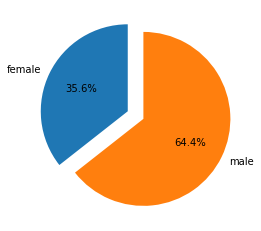

In [29]:
plt.pie(gender4['Count'],labels=(gender4['sex']),autopct='%1.1f%%',explode=[0.1,0.1],startangle=90)

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x360 with 0 Axes>

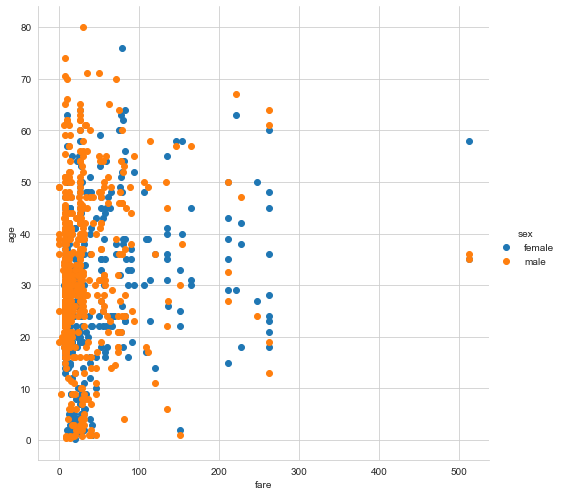

In [35]:
sns.set_style("whitegrid");
sns.FacetGrid(titanic, hue="sex", size=7) \
   .map(plt.scatter, "fare", "age") \
   .add_legend();
plt.show();

Scipy:
We have the min and max temperatures in a city In India for each months of the year.
We would like to find a function to describe this and show it graphically, the dataset
given below.
Task:
1.fitting it to the periodic function
2.plot the fit

Text(0.5, 0, 'Months')

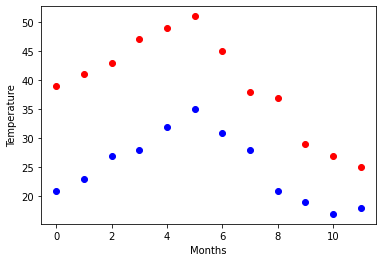

In [18]:

Max_t = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min_t = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])

months=np.arange(12)
plt.plot(months,Max_t,'ro')
plt.plot(months,Min_t,'bo')
plt.ylabel('Temperature')
plt.xlabel('Months')

In [20]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,Max, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,Min, [-40, 20, 0])

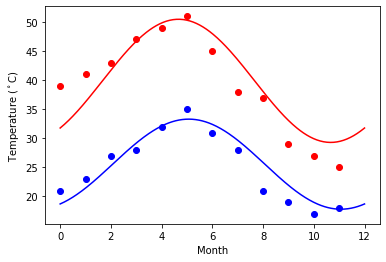

In [22]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, Max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, Min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()